In [1]:
# import libraries
import requests
import json
import os
import re
from impo.impo import imp_inst as imp 
import datetime

imp.import_or_install('flask')
imp.import_or_install('pandas')
from flask import Flask, request, render_template, redirect, url_for, Markup
import pandas as pd
from lstm.lstm import Lstm

flask is already installed
pandas is already installed
pandas is already installed
scikit-learn is not installed, installing now...
scikit-learn has been installed
numpy is already installed
tensorflow is already installed
keras is already installed
matplotlib is already installed
plotly is already installed


In [2]:
def render_predictions(tickers):
    predictions_html = """
<!DOCTYPE html>
<html lang="en">
<head>
  <title>Global</title>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <meta http-equiv="X-UA-Compatible" content="IE=edge">
  <meta name="description" content="HTML5 website template">
  <meta name="keywords" content="global, template, html, sass, jquery">
  <meta name="author" content="Bucky Maler">
  <link rel="stylesheet" href="{{ url_for('static', filename='css/main.css') }}">
  <style>
    /* CSS for fullscreen image */
    .fullscreen {
        position: fixed;
        top: 0;
        left: 0;
        width: 100%;
        height: 100%;
        background-color: rgba(0, 0, 0, 0.8);
        display: flex;
        justify-content: center;
        align-items: center;
    }
    
    .fullscreen img {
        max-width: 90%;
        max-height: 90%;
    }
</style>
</head>
<body>

<!-- notification for small viewports and landscape oriented smartphones -->
<div class="device-notification">
  <a class="device-notification--logo" href="#0">
    <img src="{{ url_for('static', filename='img/logo.png') }}" alt="QuantAI">
    <p>QuantAI</p>
  </a>
  <p class="device-notification--message">Global has so much to offer that we must request you orient your device to portrait or find a larger screen. You won't be disappointed.</p>
</div>

<div class="perspective effect-rotate-left">
  <div class="container"><div class="outer-nav--return"></div>
    <div id="viewport" class="l-viewport">
      <div class="l-wrapper">
        <header class="header">
          <a class="header--logo" href="http://localhost:5001/demo">
            <img src="{{ url_for('static', filename='img/logo.png') }}" alt="QuantAI">
            <p>Quant AI</p>
          </a>
          <button class="header--cta cta">Hire Us</button>
          <div class="header--nav-toggle">
            <span></span>
          </div>
        </header>
        <nav class="l-side-nav">
          <ul class="side-nav">
            <li class="is-active"><span>Home</span></li>
            <li><span>Predictions</span></li>
          </ul>
        </nav>
        <ul class="l-main-content main-content">

          <li class="l-section section section--is-active">
            <div class="intro">
              <div class="intro--banner">
                <h1>Predictions</h1>
                <button class="cta">See Predictions
                  <svg version="1.1" id="Layer_1" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" x="0px" y="0px" viewBox="0 0 150 118" style="enable-background:new 0 0 150 118;" xml:space="preserve">
                  <g transform="translate(0.000000,118.000000) scale(0.100000,-0.100000)">
                    <path d="M870,1167c-34-17-55-57-46-90c3-15,81-100,194-211l187-185l-565-1c-431,0-571-3-590-13c-55-28-64-94-18-137c21-20,33-20,597-20h575l-192-193C800,103,794,94,849,39c20-20,39-29,61-29c28,0,63,30,298,262c147,144,272,271,279,282c30,51,23,60-219,304C947,1180,926,1196,870,1167z"/>
                  </g>
                  </svg>
                  <span class="btn-background"></span>
                </button>
                <img src="{{ url_for('static', filename='img/introduction-visual.png') }}" alt="Welcome">
              </div>
              <div class="intro--options">
                <a href="#0">
                  <h3>Scroll &amp; Down to see the predictions</h3>
                  
                </a>
              </div>
            </div>
          </li>

          <li class="l-section section">
            <div class="intro">
              <h2>Predictions</h2>
              <div class="work--lockup">
                <ul class="slider">
    """
    positions = ['left', 'center', 'right']
    i = 0
    for ticker in tickers:
        ticker_str = "{"
        ticker_str += f"{{ url_for('static', filename='img/{str(ticker)}.png') }}"
        ticker_str += "}"
        predictions_html += f"""
                  <li class="slider--item slider--item-{str(positions[i])}">
                    <a href="#0" onclick="openFullscreen('{str(ticker_str)}')">
                      <div class="slider--item-image">
                        <img src="{str(ticker_str)}" alt="{str(ticker)}">
                      </div>
                      <p class="slider--item-title">{str(ticker)}</p>
                    </a>
                  </li>                  
        """
        i += 1
                      
    predictions_html += """
                    </ul>
                    <script>
                        function openFullscreen(imageUrl) {
                            var fullscreen = document.createElement('div');
                            fullscreen.classList.add('fullscreen');
                            var img = document.createElement('img');
                            img.src = imageUrl;
                            fullscreen.appendChild(img);
                            document.body.appendChild(fullscreen);
                            
                            // Close fullscreen on click
                            fullscreen.addEventListener('click', function () {
                                document.body.removeChild(fullscreen);
                            });
                        }
                    </script>

                          <style>

                            .slider--item-image img {
                              transition: transform 0.3s;
                            }

                            .slider--item-image img:hover {
                              transform: scale(1.2);
                            }

                          </style>

                    <div class="slider--prev">
                      <svg version="1.1" id="Layer_1" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" x="0px" y="0px"
                      viewBox="0 0 150 118" style="enable-background:new 0 0 150 118;" xml:space="preserve">
                      <g transform="translate(0.000000,118.000000) scale(0.100000,-0.100000)">
                        <path d="M561,1169C525,1155,10,640,3,612c-3-13,1-36,8-52c8-15,134-145,281-289C527,41,562,10,590,10c22,0,41,9,61,29
                        c55,55,49,64-163,278L296,510h575c564,0,576,0,597,20c46,43,37,109-18,137c-19,10-159,13-590,13l-565,1l182,180
                        c101,99,187,188,193,199c16,30,12,57-12,84C631,1174,595,1183,561,1169z"/>
                      </g>
                      </svg>
                    </div>

                    <div class="slider--next">
                      <svg version="1.1" id="Layer_1" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" x="0px" y="0px" viewBox="0 0 150 118" style="enable-background:new 0 0 150 118;" xml:space="preserve">
                      <g transform="translate(0.000000,118.000000) scale(0.100000,-0.100000)">
                        <path d="M870,1167c-34-17-55-57-46-90c3-15,81-100,194-211l187-185l-565-1c-431,0-571-3-590-13c-55-28-64-94-18-137c21-20,33-20,597-20h575l-192-193C800,103,794,94,849,39c20-20,39-29,61-29c28,0,63,30,298,262c147,144,272,271,279,282c30,51,23,60-219,304C947,1180,926,1196,870,1167z"/>
                      </g>
                      </svg>
                    </div>
                  </div>
                </div>
              </li>
            </ul>
          </div>
        </div>
      </div>
      <ul class="outer-nav">
        <li class="is-active">Home</li>
        <li >Predictions</li>
      </ul>
    </div>

    <script src="https://ajax.googleapis.com/ajax/libs/jquery/2.2.4/jquery.min.js"></script>
    <script>window.jQuery || document.write("<script src='{{ url_for('static', filename='js/vendor/jquery-2.2.4.min.js') }}'><\/script>")</script>
    <script src="{{ url_for('static', filename='js/functions-min.js') }}"></script>
    </body>
    </html>
    """
    return predictions_html

 * Serving Flask app 'Stock Predictions'
 * Debug mode: off


 * Running on http://localhost:5001
Press CTRL+C to quit
127.0.0.1 - - [22/May/2023 11:01:35] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2023 11:01:35] "GET /static/img/logo.png HTTP/1.1" 304 -
127.0.0.1 - - [22/May/2023 11:01:35] "GET /static/css/main.css HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2023 11:01:35] "GET /static/js/functions-min.js HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2023 11:01:35] "GET /static/img/introduction-visual.png HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2023 11:01:35] "GET /static/img/work-victory.jpg HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2023 11:01:35] "GET /static/img/work-metiew-smith.jpg HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2023 11:01:35] "GET /static/img/work-alex-nowak.jpg HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2023 11:01:35] "GET /static/img/about-visual.png HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2023 11:01:35] "GET /static/img/about-winners.jpg HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2023 11:01:35] "GET /static/img/contact-visual.png HTTP/1.1" 200 -
127.0.0.1 - 

"Selected stocks: ['MSFT', 'AMZN', 'NVDA']"

'Selected time range: 3'

'Custom model: None'


lstm intance initialized
MSFT data imported. Size: (1259, 34)
MSFT size: (1259, 34)
3/3 [==============================] - 0s 1ms/step


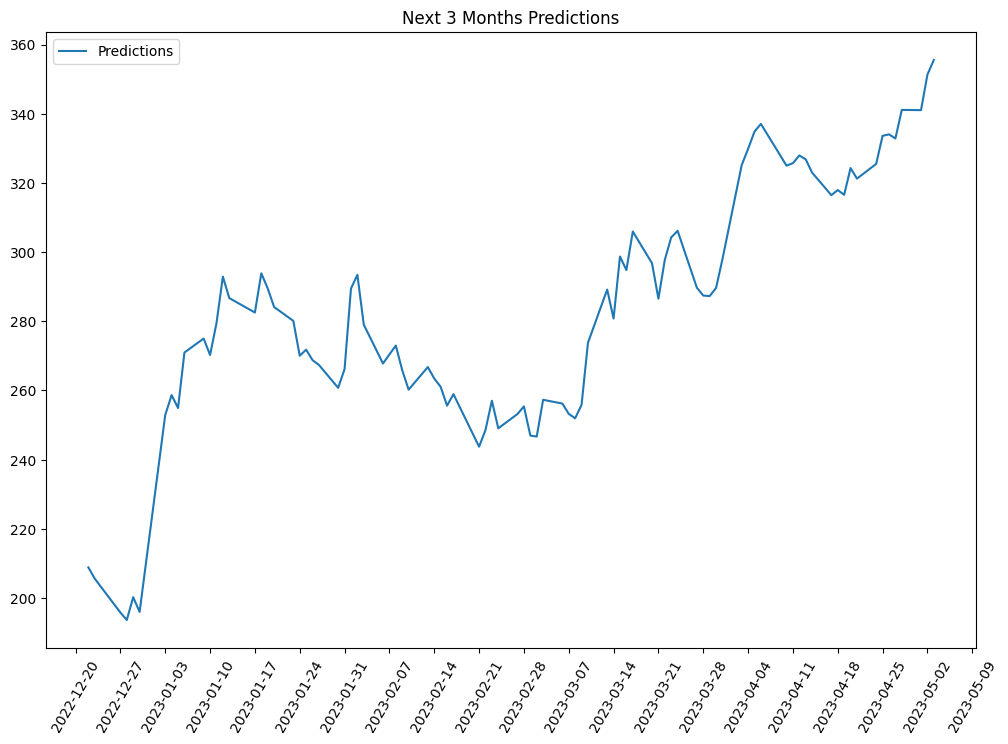


lstm intance initialized
AMZN data imported. Size: (1259, 34)
AMZN size: (1259, 34)
3/3 [==============================] - 0s 1ms/step


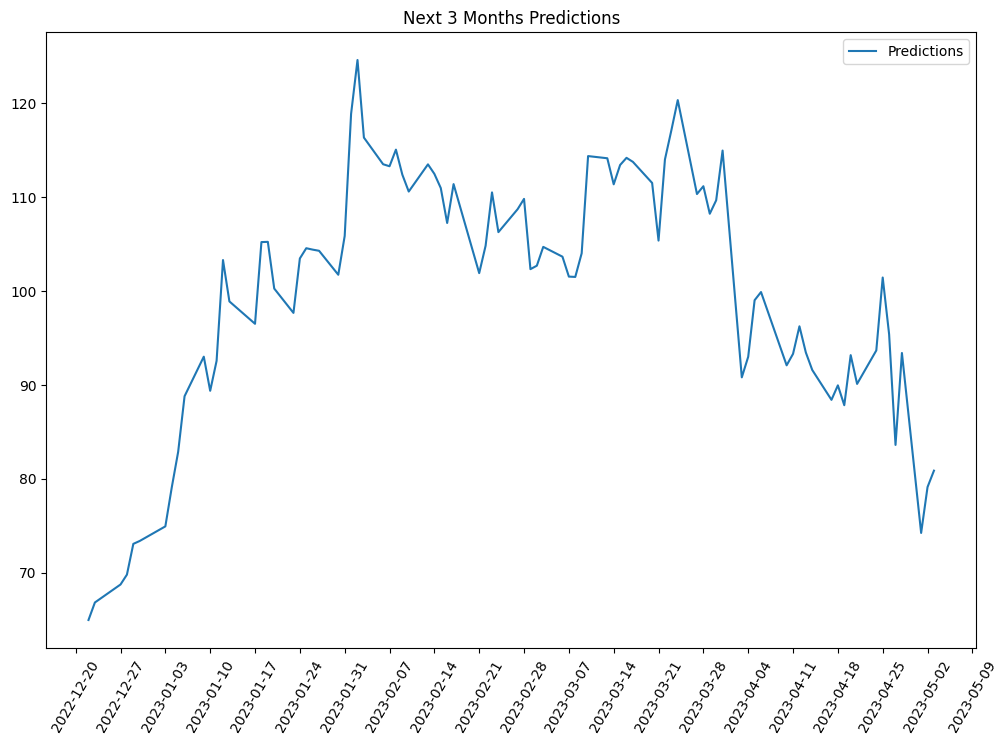


lstm intance initialized
NVDA data imported. Size: (1259, 34)
NVDA size: (1259, 34)
3/3 [==============================] - 0s 1ms/step


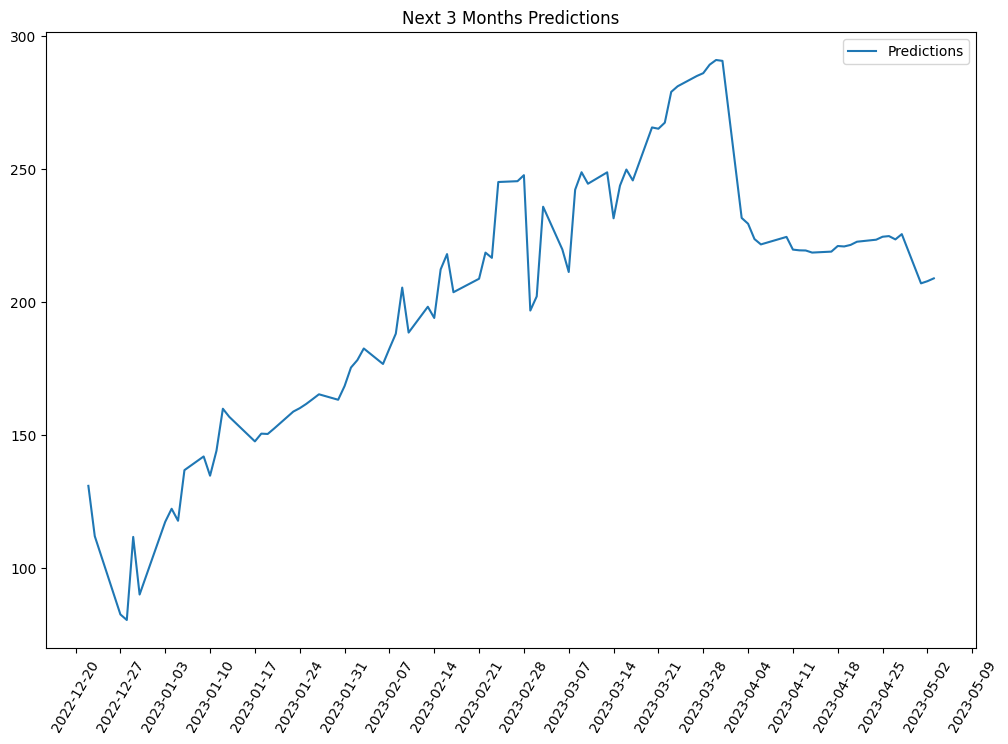

127.0.0.1 - - [22/May/2023 11:03:07] "POST /demo HTTP/1.1" 302 -
127.0.0.1 - - [22/May/2023 11:03:07] "GET /predictions HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2023 11:03:07] "GET /static/css/main.css HTTP/1.1" 304 -
127.0.0.1 - - [22/May/2023 11:03:07] "GET /static/img/introduction-visual.png HTTP/1.1" 304 -
127.0.0.1 - - [22/May/2023 11:03:07] "GET /static/img/logo.png HTTP/1.1" 304 -
127.0.0.1 - - [22/May/2023 11:03:07] "GET /static/img/MSFT.png HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2023 11:03:07] "GET /static/js/functions-min.js HTTP/1.1" 304 -
127.0.0.1 - - [22/May/2023 11:03:07] "GET /static/img/AMZN.png HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2023 11:03:07] "GET /static/img/NVDA.png HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2023 11:03:07] "GET /static/css/fonts/Montserrat-Black.woff HTTP/1.1" 304 -
127.0.0.1 - - [22/May/2023 11:03:07] "GET /static/css/fonts/Montserrat-Light.woff HTTP/1.1" 304 -
127.0.0.1 - - [22/May/2023 11:03:07] "GET /static/css/fonts/Montserrat-Bold.woff HTTP/1.1" 30

overwritten


127.0.0.1 - - [22/May/2023 11:03:29] "GET /demo HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2023 11:03:29] "GET /static/css/main.css HTTP/1.1" 304 -
127.0.0.1 - - [22/May/2023 11:03:29] "GET /static/img/logo.png HTTP/1.1" 304 -
127.0.0.1 - - [22/May/2023 11:03:29] "GET /static/js/functions-min.js HTTP/1.1" 304 -
127.0.0.1 - - [22/May/2023 11:03:29] "GET /static/img/introduction-visual.png HTTP/1.1" 304 -
127.0.0.1 - - [22/May/2023 11:03:29] "GET /static/css/fonts/Montserrat-Bold.woff HTTP/1.1" 304 -
127.0.0.1 - - [22/May/2023 11:03:29] "GET /static/css/fonts/Montserrat-Regular.woff HTTP/1.1" 304 -
127.0.0.1 - - [22/May/2023 11:03:29] "GET /static/css/fonts/Montserrat-Light.woff HTTP/1.1" 304 -
127.0.0.1 - - [22/May/2023 11:03:29] "GET /static/css/fonts/Montserrat-Black.woff HTTP/1.1" 304 -


"Selected stocks: ['MSFT', 'AMZN', 'NVDA']"

'Selected time range: 3'

'Custom model: on'


lstm intance initialized
MSFT data imported. Size: (1259, 34)
MSFT size: (1259, 34)
Epoch 1/1001
24/24 [==============================] - 1s 9ms/step - loss: 156.9925 - mae: 156.9925 - val_loss: 131.0076 - val_mae: 131.0076
Epoch 2/1001
24/24 [==============================] - 0s 2ms/step - loss: 32.4153 - mae: 32.4153 - val_loss: 39.9195 - val_mae: 39.9195
Epoch 3/1001
24/24 [==============================] - 0s 2ms/step - loss: 20.1144 - mae: 20.1144 - val_loss: 39.1342 - val_mae: 39.1342
Epoch 4/1001
24/24 [==============================] - 0s 2ms/step - loss: 16.8835 - mae: 16.8835 - val_loss: 39.4245 - val_mae: 39.4245
Epoch 5/1001
24/24 [==============================] - 0s 2ms/step - loss: 15.6778 - mae: 15.6778 - val_loss: 40.0807 - val_mae: 40.0807
Epoch 6/1001
24/24 [==============================] - 0s 2ms/step - loss: 13.2596 - mae: 13.2596 - val_loss: 40.4860 - val_mae: 40.4860
Epoch 7/1001
24/24 [==============================] - 0s 2ms/step - loss: 12.6175 - mae: 12.617

Epoch 61/1001
24/24 [==============================] - 0s 2ms/step - loss: 5.4468 - mae: 5.4468 - val_loss: 40.4478 - val_mae: 40.4478
Epoch 62/1001
24/24 [==============================] - 0s 2ms/step - loss: 5.2490 - mae: 5.2490 - val_loss: 42.4688 - val_mae: 42.4688
Epoch 63/1001
24/24 [==============================] - 0s 2ms/step - loss: 5.5625 - mae: 5.5625 - val_loss: 42.1707 - val_mae: 42.1707
Epoch 64/1001
24/24 [==============================] - 0s 2ms/step - loss: 5.1280 - mae: 5.1280 - val_loss: 44.6814 - val_mae: 44.6814
Epoch 65/1001
24/24 [==============================] - 0s 2ms/step - loss: 4.9036 - mae: 4.9036 - val_loss: 44.7855 - val_mae: 44.7855
Epoch 66/1001
24/24 [==============================] - 0s 2ms/step - loss: 5.0655 - mae: 5.0655 - val_loss: 45.8535 - val_mae: 45.8535
Epoch 67/1001
24/24 [==============================] - 0s 2ms/step - loss: 5.0543 - mae: 5.0543 - val_loss: 44.7768 - val_mae: 44.7768
Epoch 68/1001
24/24 [==============================] - 

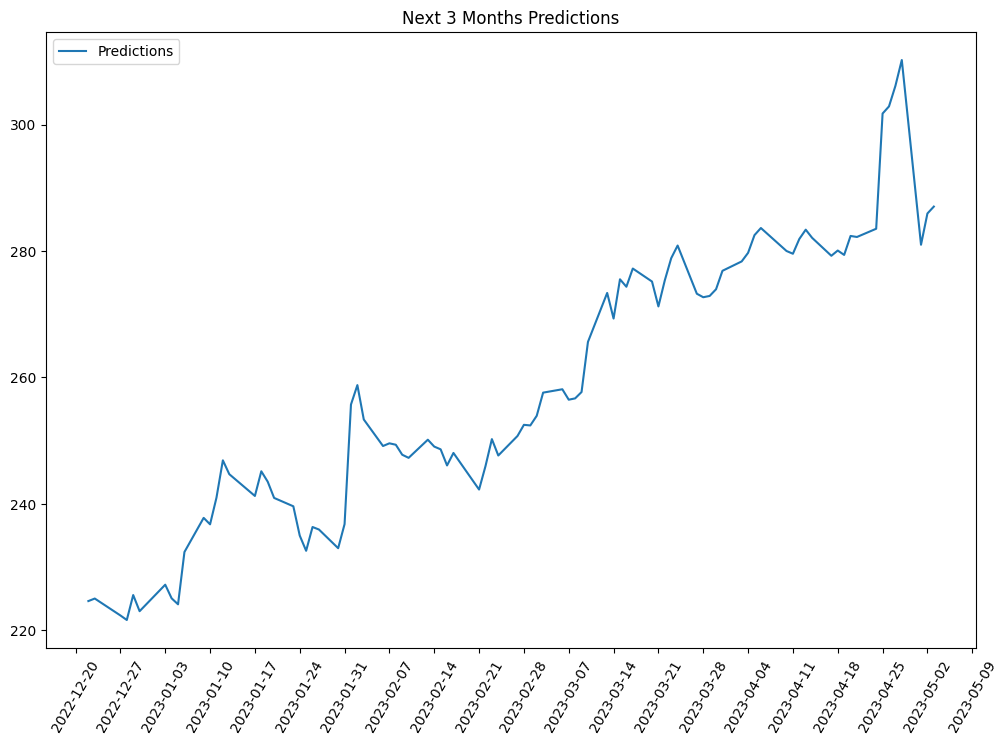


lstm intance initialized
AMZN data imported. Size: (1259, 34)
AMZN size: (1259, 34)
Epoch 1/1001
24/24 [==============================] - 1s 9ms/step - loss: 93.3795 - mae: 93.3795 - val_loss: 31.2634 - val_mae: 31.2634
Epoch 2/1001
24/24 [==============================] - 0s 2ms/step - loss: 18.7616 - mae: 18.7616 - val_loss: 14.3451 - val_mae: 14.3451
Epoch 3/1001
24/24 [==============================] - 0s 2ms/step - loss: 14.4480 - mae: 14.4480 - val_loss: 17.0065 - val_mae: 17.0065
Epoch 4/1001
24/24 [==============================] - 0s 2ms/step - loss: 12.0910 - mae: 12.0910 - val_loss: 15.8000 - val_mae: 15.8000
Epoch 5/1001
24/24 [==============================] - 0s 2ms/step - loss: 11.2370 - mae: 11.2370 - val_loss: 19.6014 - val_mae: 19.6014
Epoch 6/1001
24/24 [==============================] - 0s 2ms/step - loss: 10.8908 - mae: 10.8908 - val_loss: 18.8239 - val_mae: 18.8239
Epoch 7/1001
24/24 [==============================] - 0s 2ms/step - loss: 9.6374 - mae: 9.6374 - va

24/24 [==============================] - 0s 2ms/step - loss: 4.0677 - mae: 4.0677 - val_loss: 23.5670 - val_mae: 23.5670
Epoch 62/1001
24/24 [==============================] - 0s 2ms/step - loss: 2.6648 - mae: 2.6648 - val_loss: 26.0761 - val_mae: 26.0761
Epoch 63/1001
24/24 [==============================] - 0s 2ms/step - loss: 2.8188 - mae: 2.8188 - val_loss: 24.6728 - val_mae: 24.6728
Epoch 64/1001
24/24 [==============================] - 0s 2ms/step - loss: 2.8351 - mae: 2.8351 - val_loss: 25.0696 - val_mae: 25.0696
Epoch 65/1001
24/24 [==============================] - 0s 2ms/step - loss: 2.5586 - mae: 2.5586 - val_loss: 25.1461 - val_mae: 25.1461
Epoch 66/1001
24/24 [==============================] - 0s 2ms/step - loss: 2.5568 - mae: 2.5568 - val_loss: 25.1877 - val_mae: 25.1877
Epoch 67/1001
24/24 [==============================] - 0s 2ms/step - loss: 2.5565 - mae: 2.5565 - val_loss: 25.3057 - val_mae: 25.3057
Epoch 68/1001
24/24 [==============================] - 0s 2ms/step - 

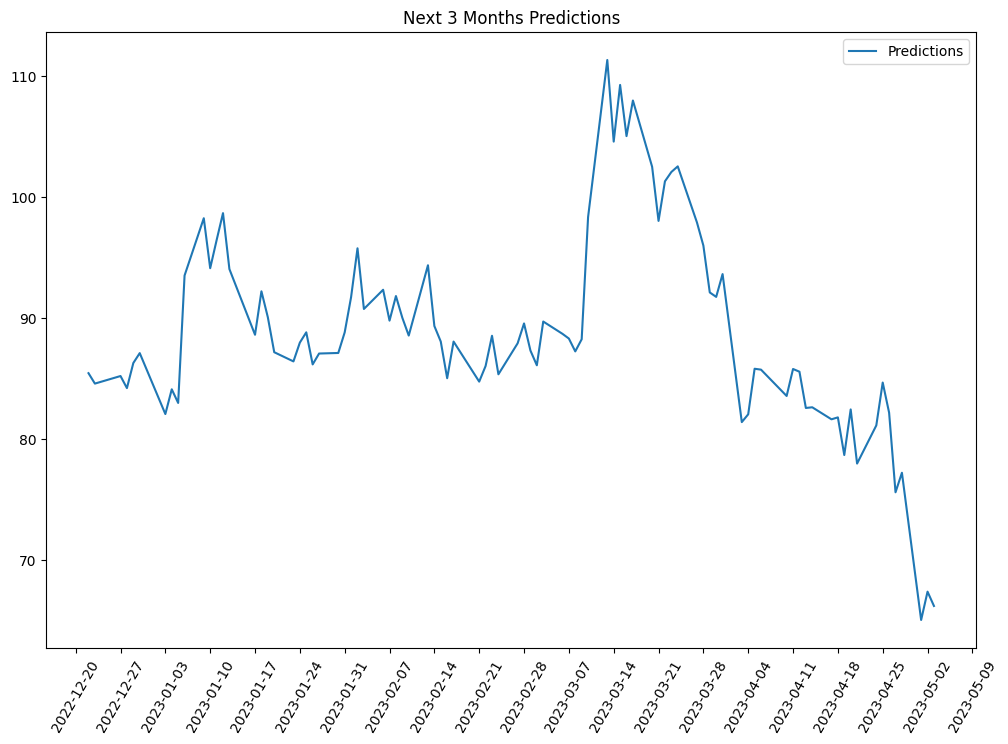


lstm intance initialized
NVDA data imported. Size: (1259, 34)
NVDA size: (1259, 34)
Epoch 1/1001
24/24 [==============================] - 1s 9ms/step - loss: 70.7341 - mae: 70.7341 - val_loss: 81.1160 - val_mae: 81.1160
Epoch 2/1001
24/24 [==============================] - 0s 3ms/step - loss: 19.4851 - mae: 19.4851 - val_loss: 65.1563 - val_mae: 65.1563
Epoch 3/1001
24/24 [==============================] - 0s 2ms/step - loss: 15.8045 - mae: 15.8045 - val_loss: 61.6341 - val_mae: 61.6341
Epoch 4/1001
24/24 [==============================] - 0s 2ms/step - loss: 14.2547 - mae: 14.2547 - val_loss: 73.6781 - val_mae: 73.6781
Epoch 5/1001
24/24 [==============================] - 0s 2ms/step - loss: 12.6104 - mae: 12.6104 - val_loss: 66.1914 - val_mae: 66.1914
Epoch 6/1001
24/24 [==============================] - 0s 2ms/step - loss: 9.0807 - mae: 9.0807 - val_loss: 68.1784 - val_mae: 68.1784
Epoch 7/1001
24/24 [==============================] - 0s 2ms/step - loss: 7.4463 - mae: 7.4463 - val_

24/24 [==============================] - 0s 2ms/step - loss: 2.7768 - mae: 2.7768 - val_loss: 72.5550 - val_mae: 72.5550
Epoch 62/1001
24/24 [==============================] - 0s 2ms/step - loss: 2.5330 - mae: 2.5330 - val_loss: 71.9551 - val_mae: 71.9551
Epoch 63/1001
24/24 [==============================] - 0s 2ms/step - loss: 2.5776 - mae: 2.5776 - val_loss: 67.3359 - val_mae: 67.3359
Epoch 64/1001
24/24 [==============================] - 0s 2ms/step - loss: 2.5545 - mae: 2.5545 - val_loss: 70.9267 - val_mae: 70.9267
Epoch 65/1001
24/24 [==============================] - 0s 2ms/step - loss: 2.4906 - mae: 2.4906 - val_loss: 69.7768 - val_mae: 69.7768
Epoch 66/1001
24/24 [==============================] - 0s 2ms/step - loss: 2.0666 - mae: 2.0666 - val_loss: 69.8882 - val_mae: 69.8882
Epoch 67/1001
24/24 [==============================] - 0s 2ms/step - loss: 2.4487 - mae: 2.4487 - val_loss: 68.1957 - val_mae: 68.1957
Epoch 68/1001
24/24 [==============================] - 0s 2ms/step - 

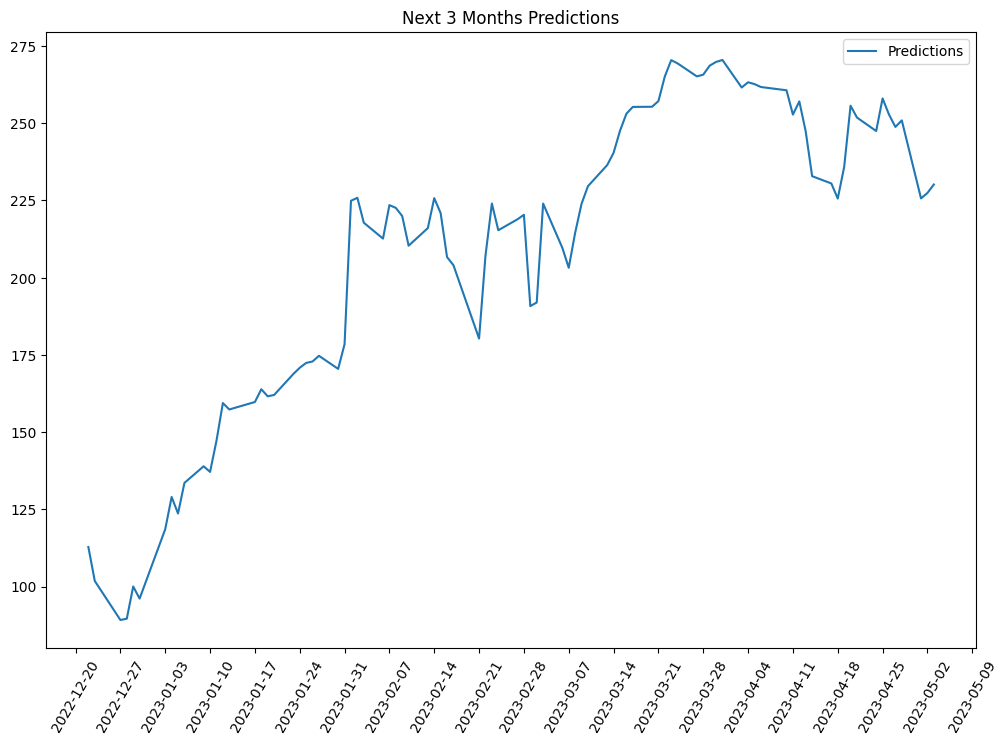

'Number of LSTM layers: 2'

'Learning rate: 0.005'

'Early Stopping: 100'

'Number of Epochs: 1001'

127.0.0.1 - - [22/May/2023 11:04:11] "POST /demo HTTP/1.1" 302 -
INFO:werkzeug:127.0.0.1 - - [22/May/2023 11:04:11] "POST /demo HTTP/1.1" 302 -
127.0.0.1 - - [22/May/2023 11:04:11] "GET /predictions HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [22/May/2023 11:04:11] "GET /predictions HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2023 11:04:11] "GET /static/css/main.css HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [22/May/2023 11:04:11] "GET /static/css/main.css HTTP/1.1" 304 -
127.0.0.1 - - [22/May/2023 11:04:11] "GET /static/img/logo.png HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [22/May/2023 11:04:11] "GET /static/img/logo.png HTTP/1.1" 304 -
127.0.0.1 - - [22/May/2023 11:04:11] "GET /static/js/functions-min.js HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [22/May/2023 11:04:11] "GET /static/js/functions-min.js HTTP/1.1" 304 -
127.0.0.1 - - [22/May/2023 11:04:11] "GET /static/img/introduction-visual.png HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [22/May/2023 11:04:11] "GET /static/img/introduc

overwritten


In [ ]:
app = Flask("Stock Predictions", static_folder='static')
app.config['TEMPLATES_AUTO_RELOAD'] = True
        
@app.route('/')
def index():
    return render_template('index.html')
    
@app.route('/predictions')
def predictions():
    return render_template('predictions.html')

@app.route('/demo', methods=['GET', 'POST'])
def demo():
    if request.method == 'POST':
        tickers = request.form.getlist('stock-name')
        time = int(request.form.get('time-name'))
        toggle = request.form.get('model-name-toggle')
        layers = int(request.form.get('model-1'))
        lr = float(request.form.get('model-2'))
        early_stopping = int(request.form.get('model-3'))
        epochs = int(request.form.get('model-4'))
        
        display(f"Selected stocks: {tickers}")
        display(f"Selected time range: {time}")
        display(f"Custom model: {toggle}")

        if toggle is None:
            for ticker in tickers:
                # Still need to define time in lstm.py
                lstm = Lstm(ticker, time)
                lstm.predict()
                lstm.plot_preds()
        else:
            for ticker in tickers:
                lstm = Lstm(ticker, time)
                lstm.train_lstm(layers=layers, 
                                lr=lr, 
                                early_stopping=early_stopping, 
                                epochs=epochs,
                                save='Off')
                lstm.predict()
                lstm.plot_preds()

        
        if toggle is None:
            pass
        else:
            display(f"Number of LSTM layers: {layers}")
            display(f"Learning rate: {lr}")
            display(f"Early Stopping: {early_stopping}")
            display(f"Number of Epochs: {epochs}")

        #predictions_html_new = render_template(predictions_html)
        #return render_template('predictions.html')
        f = open('templates/predictions.html', 'w')
        f.write(Markup(render_predictions(tickers)))
        f.flush()
        f.close()
        print("overwritten")
        return redirect(url_for('predictions'))
    else:
        return render_template('demo.html')



if __name__ == '__main__':
    app.run(host='localhost', port=5001)